QUESTION STATEMENT-
Use KNearestNeighbourRegressor to Predict Price of House.

Use pandas to get some insights into the data (10 marks)

Show some interesting visualization of the data (10 marks)

Manage data for training & testing (20)

Finding a better value of k (10)

In [38]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [18]:
#loading dataset
df=pd.read_csv(r"C:\Users\dell\Downloads\house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


GETTING INSIGHTS OF DATA-

In [19]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [21]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [22]:
#as unnamed is extra column used as index we can drop that column
df.drop("Unnamed: 0", axis=1, inplace=True)



In [23]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [25]:
df.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [26]:
df.shape

(645, 7)

In [28]:
df.size

4515

Show some interesting visualization of the data

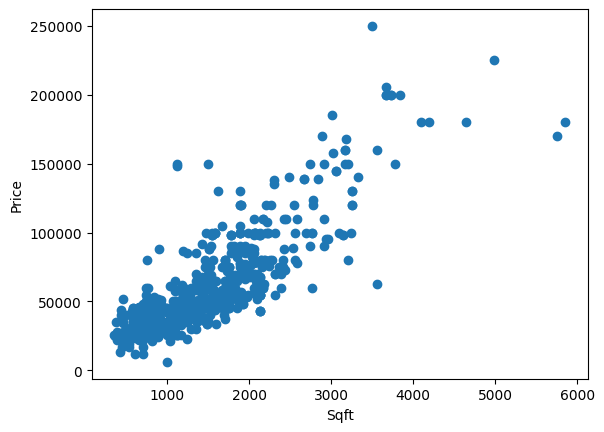

In [29]:
#scatter plot of "Sqft" vs "Price" using Matplotlib
plt.scatter(df["Sqft"], df["Price"])
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.show()


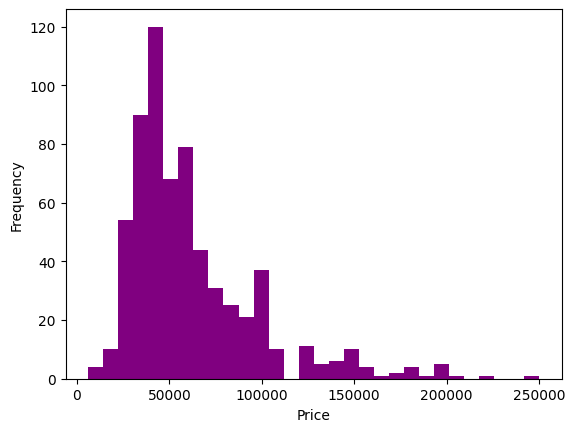

In [36]:
#histogram of "Price" using Matplotlib:
plt.hist(df["Price"], bins=30, color='purple')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


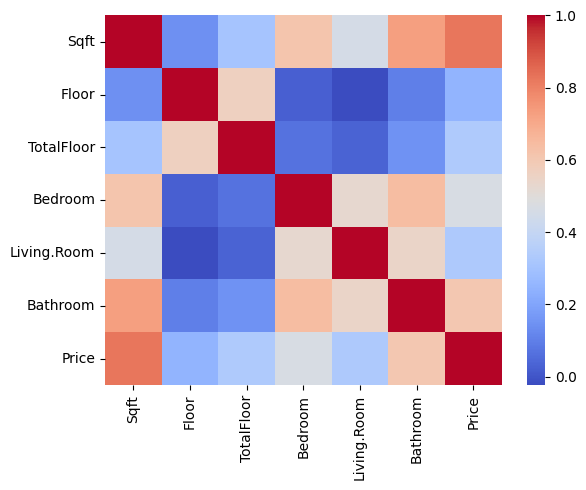

In [42]:
#correlation matrix-

corr_matrix=df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()



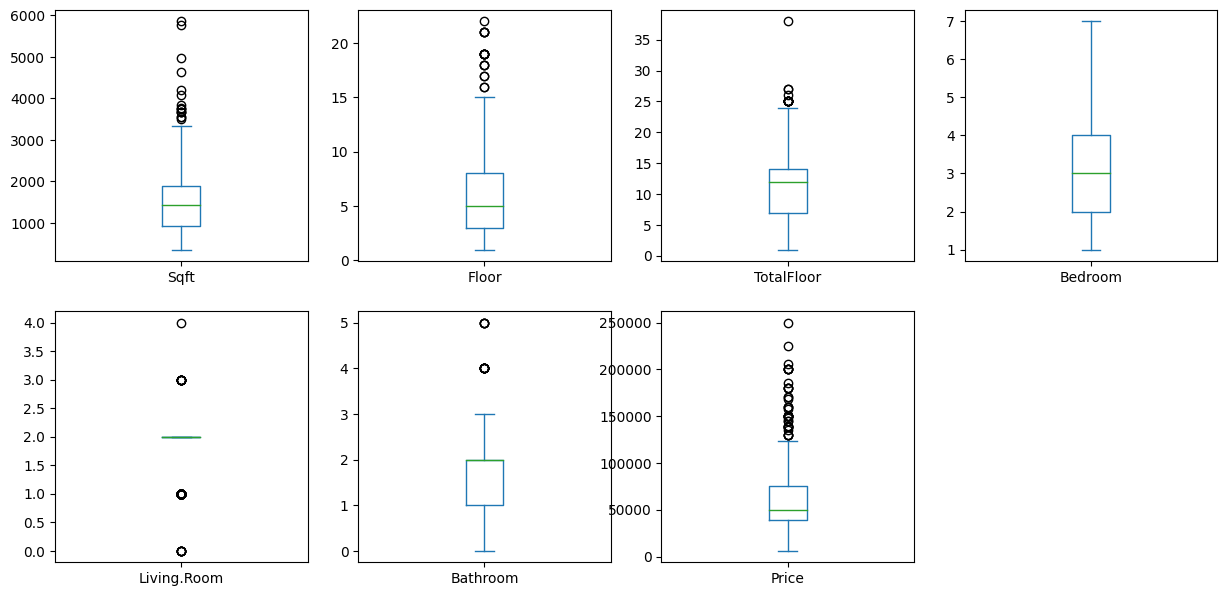

In [46]:
#BOXPLOT FOR DATA
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()


We can see that "Price" has a lot of outliers, while "Floor" and "Age" have relatively fewer outliers.

Manage data for training & testing 

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finding a better value of k

We can find a better value of k using scikit-learn's GridSearchCV function, which performs a cross-validation grid search over a range of hyperparameters.

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# initialize the KNN regressor
knn = KNeighborsRegressor()

# perform the grid search
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Score: 0.7321096511423584


The best value of k is 11, with "p" = 1 and "weights" = "distance", and the corresponding mean cross-validation score is 0.7321.